### Logistic Regression Implementation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import make_classification
#it creates dataset such that we do not need to do standardization
X,y=make_classification(n_classes=2,n_features=30,n_samples=1000,random_state=42)


In [5]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [6]:
#Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.70, random_state=42)

In [7]:
#model Traning 
from sklearn.linear_model import LogisticRegression
# There differ parameter that can be passed here like panelty ridge and lasso or elastic net
# C it is inversely proportional to lambda of l1 and l2
# class weight - used for imbalanced dataset 
# solver --Read Sklean documentation
logistic=LogisticRegression()
logistic.fit(X_train,y_train)



c:\Users\hp\MachineLearning\venv\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [8]:
# Prediction
y_pred=logistic.predict(X_test)
y_pred
#you can also get probability of prediction 
y_pred_prob=logistic.predict_proba(X_test)
#print(y_pred_prob)

##### Performance Metrics

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.8566666666666667
[[139  14]
 [ 29 118]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       153
           1       0.89      0.80      0.85       147

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



### Hyper Tuning Cross Validation


In [10]:
model=LogisticRegression()
penalty=["l1", "l2", "elasticnet", None]
c_value=[100,10,1,0.1,7,1.6]
solver=["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
params=dict(penalty=penalty,C=c_value,solver=solver)
# make sure name of parameters are exactly same as they go in modle


##### GridsearchCV


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)


In [12]:
grid

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [13]:
grid.fit(X_train,y_train)

c:\Users\hp\MachineLearning\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
330 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\MachineLearning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\MachineLearning\venv\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\hp\MachineLearning\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
    solver = _check_solver(sel

,estimator,LogisticRegression()
,param_grid,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [14]:
print(grid.best_score_)
print(grid.best_params_)

0.8571428571428571
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [15]:
y_pred=grid.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.8733333333333333
[[143  10]
 [ 28 119]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       153
           1       0.92      0.81      0.86       147

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300



##### RandomSearchCV


In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
RandomizedSearchCV=RandomizedSearchCV(estimator=model,param_distributions=params,scoring='accuracy',cv=cv,n_jobs=-1)


In [17]:
RandomizedSearchCV.fit(X_train,y_train)

c:\Users\hp\MachineLearning\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hp\MachineLearning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hp\MachineLearning\venv\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\hp\MachineLearning\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
    solver = _check_solver(self.

,estimator,LogisticRegression()
,param_distributions,"{'C': [100, 10, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [18]:
print(RandomizedSearchCV.best_score_)
print(RandomizedSearchCV.best_params_)

0.8385714285714286
{'solver': 'newton-cholesky', 'penalty': None, 'C': 0.1}


In [19]:
y_pred=RandomizedSearchCV.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.8566666666666667
[[139  14]
 [ 29 118]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       153
           1       0.89      0.80      0.85       147

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



##### Logistic OVR

In [20]:
from sklearn.datasets import make_classification
#it creates dataset such that we do not need to do standardization
'''Exactly. You hit the nail on the head.In your specific setup, n_informative=3 means that only 3 features have a mathematical relationship with the target $y$. The other 27 features are essentially baggage.'''
'''This error is happening because make_classification has a strict mathematical rule about how much "space" you need to fit your classes and clusters.
When you removed n_informative, it defaulted back to 2.
The Math Behind the ErrorThe error message is telling you:
n_classes (3) * n_clusters_per_class (2) = 6
This must be leq 2^{n_informative}'''
X,y=make_classification(n_classes=3,n_informative=15,n_features=30,n_samples=1000,random_state=42)


In [21]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [22]:
#Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.70, random_state=42)

In [23]:

#model Traning 
from sklearn.linear_model import LogisticRegression
# There differ parameter that can be passed here like panelty ridge and lasso or elastic net
# C it is inversely proportional to lambda of l1 and l2
# class weight - used for imbalanced dataset 
# solver --Read Sklean documentation
logistic=LogisticRegression(multi_class='ovr')
logistic.fit(X_train,y_train)


c:\Users\hp\MachineLearning\venv\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\MachineLearning\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


In [25]:
y_pred=logistic.predict(X_test)

In [26]:
y_pred=logistic.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.71
[[64 17 21]
 [ 6 73 17]
 [ 9 17 76]]
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       102
           1       0.68      0.76      0.72        96
           2       0.67      0.75      0.70       102

    accuracy                           0.71       300
   macro avg       0.72      0.71      0.71       300
weighted avg       0.72      0.71      0.71       300



##### Logistic Regression with Imbalanced Dataset

In [27]:
from collections import Counter
from sklearn.datasets import make_classification

In [36]:
X,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,n_redundant=0,
                        weights=[0.90],random_state=10)

In [37]:
Counter(y)

Counter({np.int64(0): 897, np.int64(1): 103})

<Axes: xlabel='0', ylabel='1'>

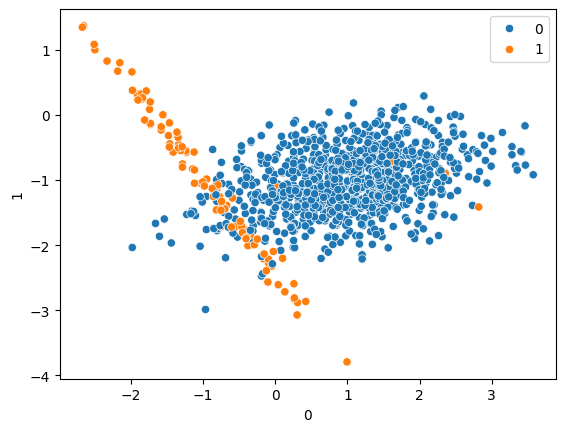

In [38]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=43)

In [42]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
c_value=[1,10,9,.01,.1,5]
penalty=['l1','l2','elasticnet']
solver=["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
class_weight=[{0:w,1:y} for w in [1,10,11,15,29,50,100] for y in [1,10,11,15,29,50,100]]


In [43]:
params=dict(penalty=penalty,solver=solver,class_weight=class_weight)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings

# To ignore ALL warnings
warnings.filterwarnings("ignore")
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)
grid.fit(X_train,y_train)

,estimator,LogisticRegression()
,param_grid,"{'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10}, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo...shuffle=False)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [48]:
y_pred=grid.predict(X_test)

In [49]:
y_pred=grid.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.924
[[209  16]
 [  3  22]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       225
           1       0.58      0.88      0.70        25

    accuracy                           0.92       250
   macro avg       0.78      0.90      0.83       250
weighted avg       0.95      0.92      0.93       250

